In [14]:
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt

In [15]:
# argo = xr.open_dataset('1902381_Sprof.nc')
# argo

In [35]:
ds = xr.load_dataset('1902381_result.nc')
ds

<xarray.Dataset> Size: 1MB
Dimensions:            (time: 332, z: 30, lat: 1, lon: 1, zi: 31)
Coordinates:
    zi                 (time, zi, lat, lon) float32 41kB -600.0 ... -9.415e-14
    z                  (time, z, lat, lon) float32 40kB -586.9 -560.7 ... -5.656
  * time               (time) datetime64[ns] 3kB 2023-01-03 ... 2023-11-30
  * lon                (lon) float32 4B -35.0
  * lat                (lat) float32 4B 16.0
Data variables: (12/30)
    total_chlorophyll  (time, z, lat, lon) float32 40kB 0.269 0.269 ... 0.02894
    carbonate_Cflx     (time, lat, lon) float32 1kB -5.464e-08 ... -1.81e-08
    carbonate_DIC      (time, z, lat, lon) float32 40kB 0.00199 ... 0.001964
    zoo_prod           (time, z, lat, lon) float32 40kB 9.31e-11 ... 5.279e-12
    mes_prod           (time, z, lat, lon) float32 40kB 8.123e-11 ... 5.08e-13
    zoo_c              (time, z, lat, lon) float32 40kB 6.07e-07 ... 2.467e-08
    ...                 ...
    dz                 (z) float64 240B 26.25 26.19 26.08 ... 12.48 11.89 11.31
    NPP                (time, lat, lon) float64 3kB 0.0 9.672e-08 ... 6.622e-08
    NewPP              (time, lat, lon) float64 3kB 0.0 4.556e-10 ... 1.868e-08
    ZooPP              (time, lat, lon) float64 3kB 1.842e-07 ... 1.667e-08
    Fratio             (time, lat, lon) float64 3kB nan 0.00471 ... 0.2821
    CO2flux            (time, lat, lon) float64 3kB -5.464e-08 ... -1.81e-08
Attributes:
    title:    GOTM simulation
    comment:  file created by flexout - https://github.com/BoldingBruggeman/f...

In [36]:
ds

<xarray.Dataset> Size: 1MB
Dimensions:            (time: 332, z: 30, lat: 1, lon: 1, zi: 31)
Coordinates:
    zi                 (time, zi, lat, lon) float32 41kB -600.0 ... -9.415e-14
    z                  (time, z, lat, lon) float32 40kB -586.9 -560.7 ... -5.656
  * time               (time) datetime64[ns] 3kB 2023-01-03 ... 2023-11-30
  * lon                (lon) float32 4B -35.0
  * lat                (lat) float32 4B 16.0
Data variables: (12/30)
    total_chlorophyll  (time, z, lat, lon) float32 40kB 0.269 0.269 ... 0.02894
    carbonate_Cflx     (time, lat, lon) float32 1kB -5.464e-08 ... -1.81e-08
    carbonate_DIC      (time, z, lat, lon) float32 40kB 0.00199 ... 0.001964
    zoo_prod           (time, z, lat, lon) float32 40kB 9.31e-11 ... 5.279e-12
    mes_prod           (time, z, lat, lon) float32 40kB 8.123e-11 ... 5.08e-13
    zoo_c              (time, z, lat, lon) float32 40kB 6.07e-07 ... 2.467e-08
    ...                 ...
    dz                 (z) float64 240B 26.25 26.19 26.08 ... 12.48 11.89 11.31
    NPP                (time, lat, lon) float64 3kB 0.0 9.672e-08 ... 6.622e-08
    NewPP              (time, lat, lon) float64 3kB 0.0 4.556e-10 ... 1.868e-08
    ZooPP              (time, lat, lon) float64 3kB 1.842e-07 ... 1.667e-08
    Fratio             (time, lat, lon) float64 3kB nan 0.00471 ... 0.2821
    CO2flux            (time, lat, lon) float64 3kB -5.464e-08 ... -1.81e-08
Attributes:
    title:    GOTM simulation
    comment:  file created by flexout - https://github.com/BoldingBruggeman/f...

In [37]:
ds.total_chlorophyll

<xarray.DataArray 'total_chlorophyll' (time: 332, z: 30, lat: 1, lon: 1)> Size: 40kB
array([[[[0.269     ]],

        [[0.269     ]],

        [[0.269     ]],

        ...,

        [[0.269     ]],

        [[0.269     ]],

        [[0.269     ]]],


       [[[0.25901815]],

        [[0.258738  ]],

        [[0.25844935]],
...
        [[0.02890087]],

        [[0.02892529]],

        [[0.02893896]]],


       [[[0.02536233]],

        [[0.0253329 ]],

        [[0.02525806]],

        ...,

        [[0.02889938]],

        [[0.02892094]],

        [[0.02894192]]]], shape=(332, 30, 1, 1), dtype=float32)
Coordinates:
    z        (time, z, lat, lon) float32 40kB -586.9 -560.7 ... -17.26 -5.656
  * time     (time) datetime64[ns] 3kB 2023-01-03 2023-01-04 ... 2023-11-30
  * lon      (lon) float32 4B -35.0
  * lat      (lat) float32 4B 16.0
Attributes:
    units:         mg m-3
    long_name:     total_chlorophyll
    valid_min:     -1e+20
    valid_max:     1e+20
    path:          /fabm/total_chlorophyll_calculator
    cell_methods:  time: mean

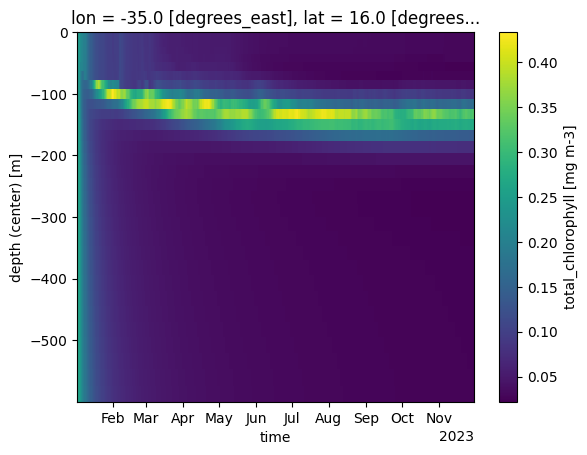

In [41]:
ds_transposed = ds.transpose()
ds_transposed.total_chlorophyll.plot()

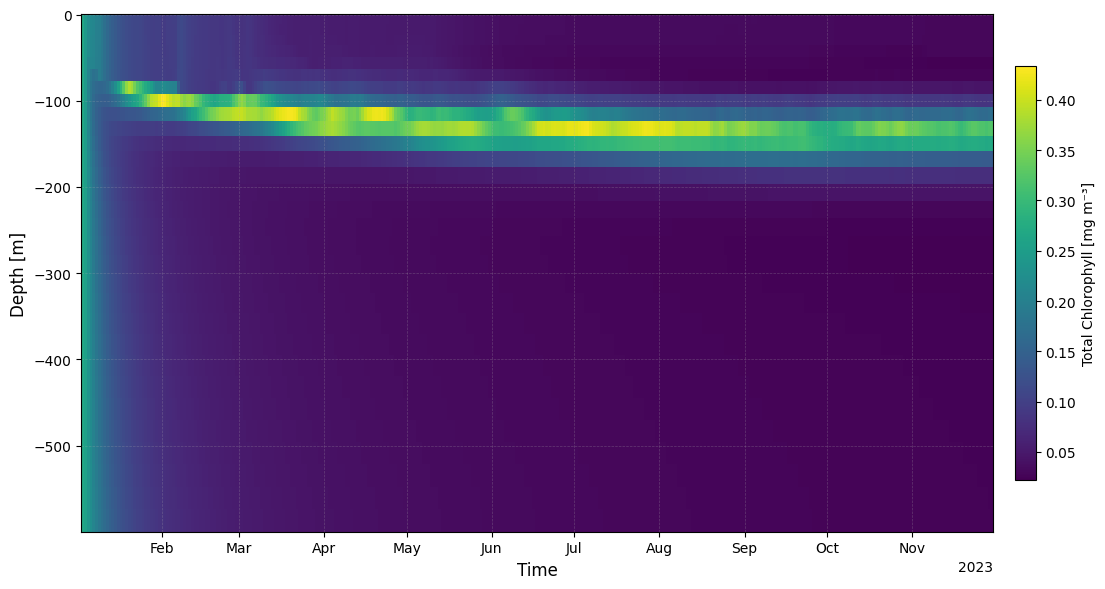

In [51]:
import matplotlib.pyplot as plt

# Create figure with better size
fig, ax = plt.subplots(figsize=(12, 6))

# Plot with transposed data
ds_transposed.total_chlorophyll.plot(
    ax=ax,
    cmap='viridis',  # or try 'YlGnBu', 'ocean', 'algae'
    cbar_kwargs={
        'label': 'Total Chlorophyll [mg m⁻³]',
        'shrink': 0.8,
        'pad': 0.02
    }
)

# Improve axis labels
ax.set_xlabel('Time', fontsize=12)
ax.set_ylabel('Depth [m]', fontsize=12)
ax.set_title('')

# Invert y-axis so depth increases downward (more intuitive)
#ax.invert_yaxis()

# Improve grid
ax.grid(True, alpha=0.3, linestyle='--', linewidth=0.5)

# Tighter layout
plt.tight_layout()
plt.show()

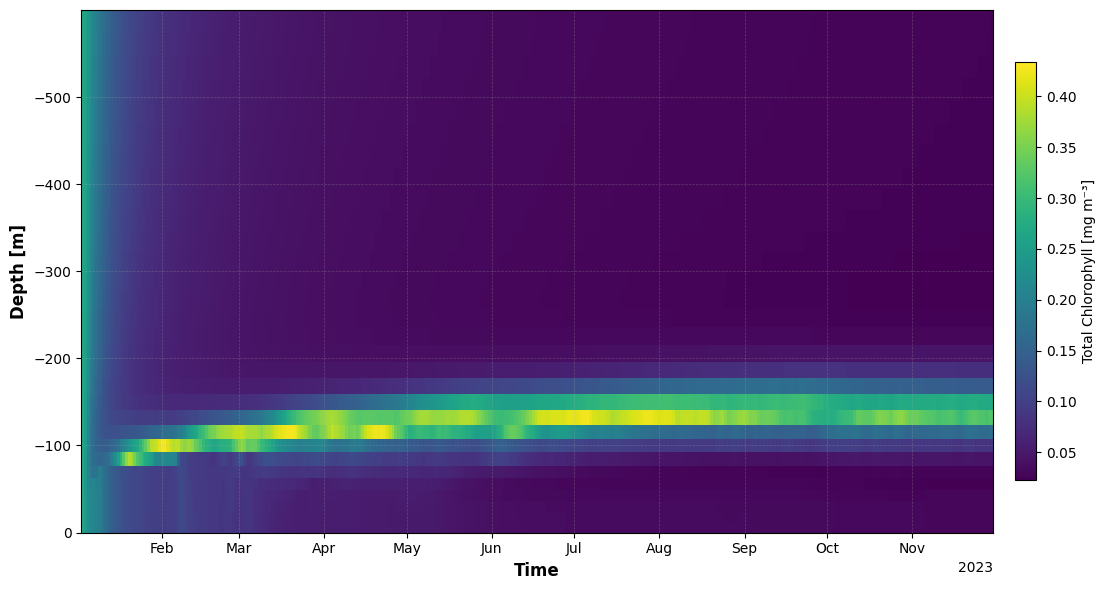

In [50]:
import matplotlib.pyplot as plt

# Create figure with better size
fig, ax = plt.subplots(figsize=(12, 6))

# Plot with transposed data
ds_transposed.total_chlorophyll.plot(
    ax=ax,
    cmap='viridis',
    cbar_kwargs={
        'label': 'Total Chlorophyll [mg m⁻³]',
        'shrink': 0.8,
        'pad': 0.02
    }
)

# Improve axis labels
ax.set_xlabel('Time', fontsize=12, fontweight='bold')
ax.set_ylabel('Depth [m]', fontsize=12, fontweight='bold')
ax.set_title('')

# Invert y-axis so depth increases downward
ax.invert_yaxis()

# Improve grid
ax.grid(True, alpha=0.3, linestyle='--', linewidth=0.5)

# Tighter layout
plt.tight_layout()
plt.show()